# 타이타닉 생존재 예측 경진대회 
* 1912년에 일어난 타이타닉호 침몰 사고를 소재로 하고 있습니다. 
* 타이타닉호 침몰 사고는 승객 2224명 중 1502명이 사망한 당시로서는 유례없는 해상 조난 사고였음 
* 승객의 성별과 연령, 승선 티켓 등급 등 여러 정보가 들어 있고, 이들의 생사 여부도 함께 주어짐
* 승객 정보를 보고 생사에 영향을 주는 속성이 무엇이며, 어떤 경향을 보이는지 파악한 후 생사 여부를 예측하는 것 (테스트 데이터)

In [836]:
import pandas as pd
import random
import numpy as np
np.random.seed(1234)
random.seed(1234)

In [837]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [838]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# EDA
* 탐색적 데이터 해석

## 데이터의 행과 열 확인하기 

In [839]:
train_df.shape
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [840]:
test_df.shape
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Pandas 내용 옵션 

In [841]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

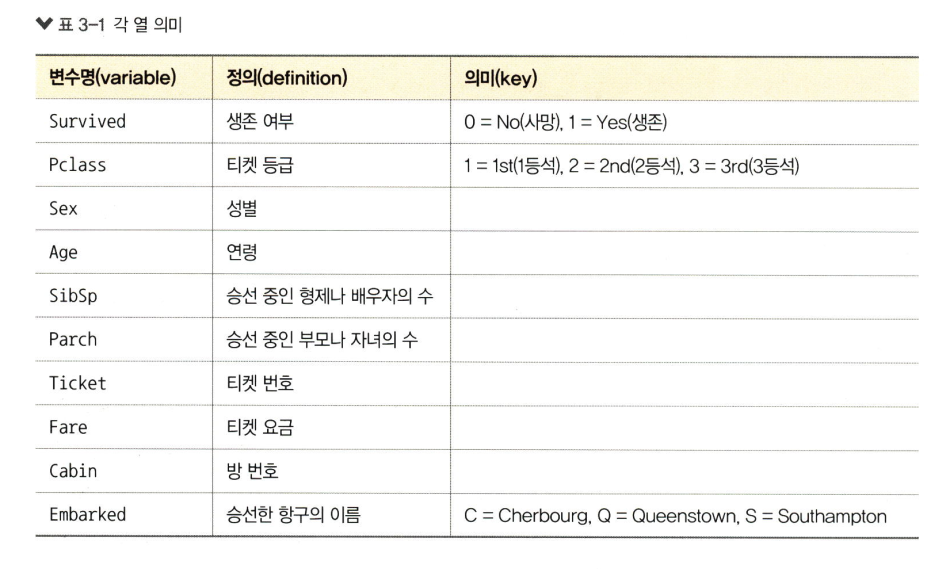

## 데이터 속성 확인하기
* 속성이란 그 데이터가 수치인지 문자열인지 등을 나타내는 것 
* 수치에는 정수인 int형이나 소수인 float형이 존재 
* int나 float 뒤의 숫자는 bit수를 나타내며, 수가 클수록 표현할 수 있는 범위가 커집니다. 

In [842]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [843]:
test_df.info() # 결측치+데이터타입
test_df.dtypes #타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 질적변수(범주형 데이터, Cateogory)
* 분류를 위한 수치로 수치 사이의 간격에 큰 의미가 없는 경우 
* 티켓 등급이 바로 질적변수
* 질적변수는 다시 명목 척도와 순서 척도로 분류되는데, 먼저 명목 척도는 '단지 분류를 위한 것'으로 방 번호나 티켓 번호 같은 것이 해당 
* 순서척도는 질적 변수 중에서도 특히 '순서에 의미가 있는 것'을 의미 
* 예를 들어 Pclass는 질적 변수 중에서도 순서 척도로 분류 

## 양적변수 
* 나이, 티켓 요금과 같이 간격에 의미가 있는 수치 
* 양적 변수는 다시 간격 척도와 비례 척도로 분류할 수 있음 
* 간격 척도란 같은 간격의 눈금으로 측적하는 것 
* 비례 척도란 간격 척도의 조건을 만족시키는 것 중 원점이 있어서 데이터 비율에 의미를 갖게 되는 것
* Fare는 비례 척도임 ( 3달러짜리 티켓은 1달러짜리 티켓보다 세 배 비싸다'라고 할 수 있기 때문임...)

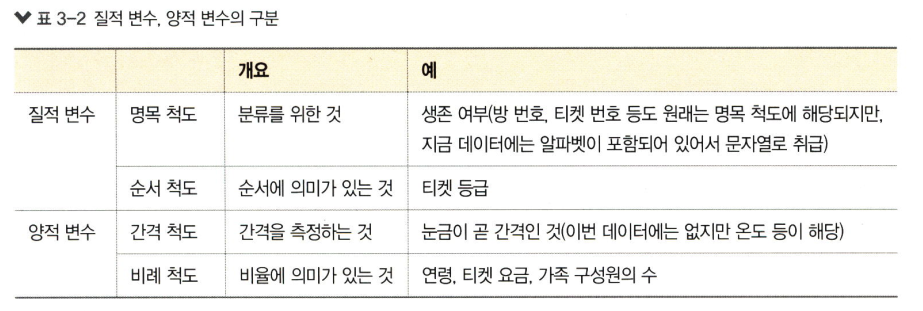

## 데이터의 통계량 확인하기 
* 주어진 데이터 중 먼저 수치 데이터 개요를 파악 
* pandas의 descripbe() 메서드를 사용하여 컬럼의 평균이나 분산등의 기술적 통계량을 볼 수 있습니다. 

In [844]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 카테고리 변수 확인하기
* 성별이나 승선 항구 등 카테고리된 변수를 확인

In [845]:
# train_df["Sex"].value_counts()
train_df["Sex"].value_counts(normalize=True)


Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [846]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [847]:
train_df.groupby(["Embarked","Sex"])["PassengerId"].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

* S는 Southampton
* C는 Cherbourg
* Q는 Queenstown
* Southampton에서 승선한 고객이 가장 많고, 이때 승선한 남성이 여성의 두 배 정도라는 것을 알 수 있음
* Cabin은 복수의 방 번호가 기재되어 있는 경우가 있으니 분석에 사용할 때 주의해야 함 

## 결측치 확인
* 변수에 결측치(아무 값도 들어 있지 않은 것, null)가 있는지 확인 
* isnull()을 사용하면 행과 열별로 결측치의 존재 여부를 판정할 수 있음 
* isnull().sum()을 동시에 사용하면 컬럼별 결측치의 개수를 파악할 수 있음

In [848]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 데이터의 시각화
* 데이터의 시각화에는 matplotlib와 seaborn를 많이 사용함 
* %matplotlib inline은 주피터 노트북 안에서 그래프를 표시하려고 의미 

In [849]:
import matplotlib.pyplot as plt
import seaborn as sns

* matplotlib의 시각화 스타일이 matlab 스타일이기 때문에 미려한 효과를 주기 위해서 ggplot 스타일로 변경 

In [850]:
plt.style.use('ggplot')

## 목적 변수 관련 데이터의 시각화 
* 목적변수(Y값) Survived에 관한 데이터 시각화 진행 

### DataFrame에서 임의의 열 추출하기 
* Survived의 값(생존 :1, 사망 :0)별로 각 값에 차이가 있는지 확인 

In [851]:
train_df[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


### 시각화하고 싶은 데이터에서 결측치 제외하기 

In [852]:
train_sns = train_df[["Embarked","Survived","PassengerId"]].dropna()

## Embarked와 Survived로만 집계하기 

In [853]:
train_sns2 = train_sns.groupby(["Embarked","Survived"])[["PassengerId"]].count()

* unstack()으로 수직 데이터를 수평 데이터 형태로 변형

In [854]:
train_sns2.unstack()

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

In [855]:
# train_sns2.groupby(["Embarked","Survived"])[["PassengerId"]].count().unstack().reset_index()

### 누적 막대 그래프로 시각화하기 
* 누적 막대 그래프를 이용하므로 stacked=True로 설정

<Axes: xlabel='Embarked'>

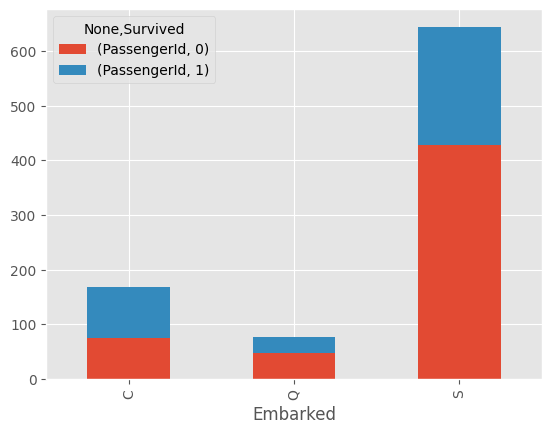

In [856]:
train_sns2.unstack().plot.bar(stacked=True)

In [857]:
# train_df.groupby(["Embarked","Survived"])["PassengerId"].count().unstack().reset_index().plot(kind="bar" , figsize=(10,6) , stacked=True,alpha=0.7)

* 비율 파생 변수 추가 

In [858]:
train_sns2.iloc[:,0]

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

In [859]:
train_sns2.iloc[:,0].sum()

889

In [860]:
train_sns2.iloc[:,0]/train_sns2.iloc[:,0].sum()

Embarked  Survived
C         0           0.084364
          1           0.104612
Q         0           0.052868
          1           0.033746
S         0           0.480315
          1           0.244094
Name: PassengerId, dtype: float64

In [861]:
# a = train_df.groupby(["Embarked","Survived"])["PassengerId"].count().reset_index()

In [862]:
# a.head(1)

In [863]:
# b = train_df.groupby(["Embarked"])["PassengerId"].count().reset_index()

In [864]:
# b.head(1)

In [865]:
# c = pd.merge(a,b, on="Embarked",how="inner")
# c["ratio"] = c.PassengerId_x / c.PassengerId_y
# c

## 성별과 티켓 등급 시각화

In [866]:
train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

In [867]:
# train_df.groupby(["Pclass","Survived"])["PassengerId"].count().unstack().reset_index().plot(kind="bar" , figsize=(10,6) , stacked=True,alpha=0.7)

<Axes: xlabel='Sex'>

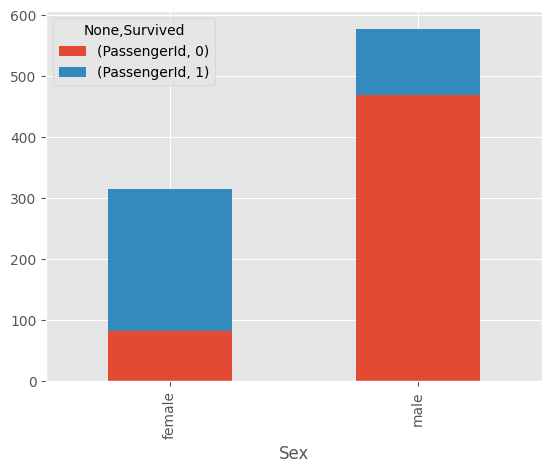

In [868]:
train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack().plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

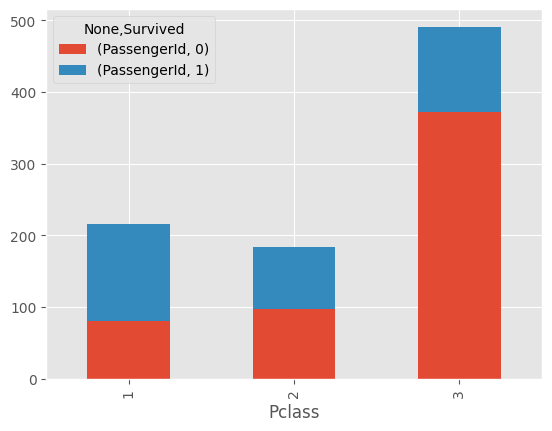

In [869]:
train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack().plot.bar(stacked=True)

* 여성이 남성보다 생존율이 높고, 티켓 등급이 높을수록 생존율이 높음

## 연령별 생존율을 히스토그램으로 시각화
* 여러 히스토그램이 동시에 보이게 하려면 인수의 histtype을 barstacked로 지정 
* 그 외 인수로는 히스토그램 빈 개수를 나타내는 bins, 라벨을 지정하는 label등이 있음
* label를 지정하면 plt.legend()를 써서 그래프 내부에 라벨을 표시

In [870]:
# train_df.head(1)

In [871]:
# import math
# train_age_df = train_df.dropna(axis=0)
# train_age_df.isnull().sum()

In [872]:
# train_df.isnull().sum()

In [873]:
# train_age_df["age_where"] = train_age_df["Age"].apply(lambda x : math.floor(x/10))
# train_age_df.head(1)
# # train_age_df["age_category"] = train_age_df["Age"].apply(lambda x : math.floor(x/10))

In [874]:
# train_age_df.groupby(["age_where","Survived"])["PassengerId"].count().reset_index()

In [875]:
# 여러 히스토그램이 동시에 보이게 하려면 인수의 histtype을 barstacked로 지정
# 그 외 인수로는 히스토그램 빈 개수를 나타내는 bins, 라벨을 지정하는 label등이 있음
# label를 지정하면 plt.legend()를 써서 그래프 내부에 라벨을 표시

In [876]:
# list=[]
# for i in range(0,10):
#     list.append(i*10)
# plt.hist(train_df["Age"], list, histtype="barstacked")

In [877]:
[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]]

[0      22.0
 4      35.0
 5       NaN
 6      54.0
 7       2.0
        ... 
 884    25.0
 885    39.0
 886    27.0
 888     NaN
 890    32.0
 Name: Age, Length: 549, dtype: float64,
 1      38.0
 2      26.0
 3      35.0
 8      27.0
 9      14.0
        ... 
 875    15.0
 879    56.0
 880    25.0
 887    19.0
 889    26.0
 Name: Age, Length: 342, dtype: float64]

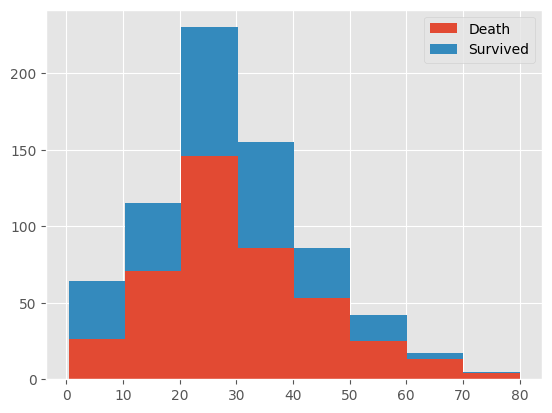

In [878]:
plt.hist(x =[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]],
            bins =8 , histtype="barstacked", label=["Death","Survived"])
plt.legend()
plt.show()

In [879]:
# # test_df.corr(numeric_only=False,method="pearson")
# # train_dummy_df = pd.get_dummies(train_df)
# train_drop_df = train_df.dropna(axis=0)

In [880]:
# train_drop_df.info()
# Sex 

In [881]:
# train_one_hot_df = pd.get_dummies(train_drop_df[["Survived", "Sex","Parch","Embarked"]])

In [882]:
# train_one_hot_df

In [883]:
# train_df.Cabin.unique()

In [884]:
# train_one_hot_df.corr(method="pearson")

In [885]:
train_df_corr = pd.get_dummies(train_df,columns=["Sex"],drop_first=True)

In [886]:
train_df_corr = pd.get_dummies(train_df_corr,columns=["Embarked"],drop_first=True)

In [887]:
train_df_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


## 카테고리 변수를 더미 변수화하기
* 각 변수와 Survived 변수 간 상관성을 분석
* 상관관계의 계산이나 머신러닝 등 처리는 수치 데이터에서만 실행할 수 있음
* 카테고리 변수를 수치 데이터로 변환

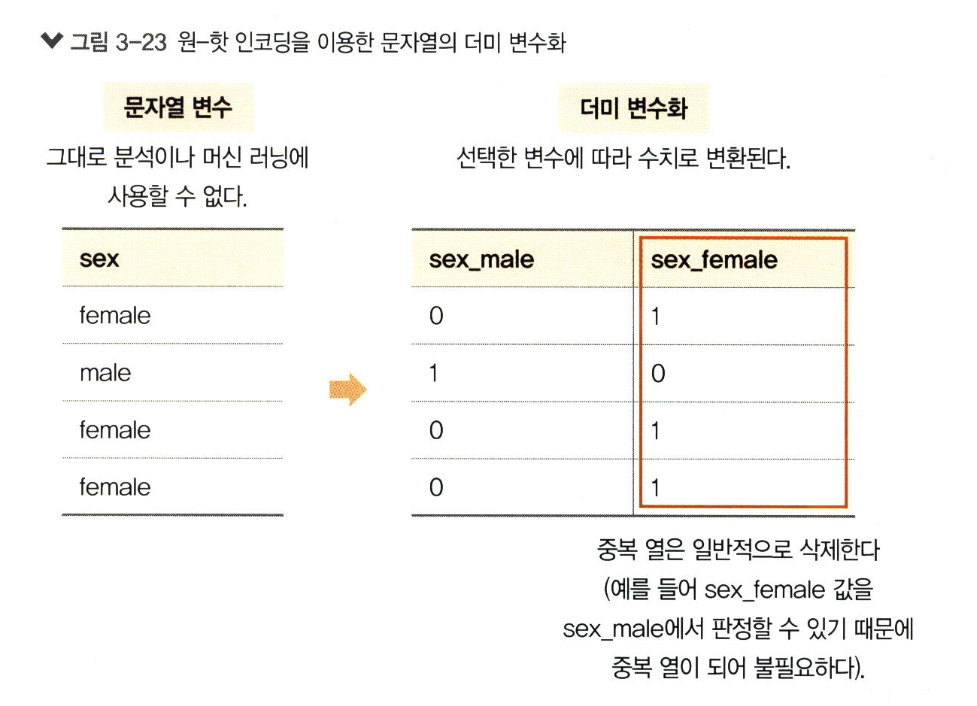

## 상관 행렬 작성하기 

In [888]:
train_df_corr.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


## 히트맵으로 시각화하기

<Axes: >

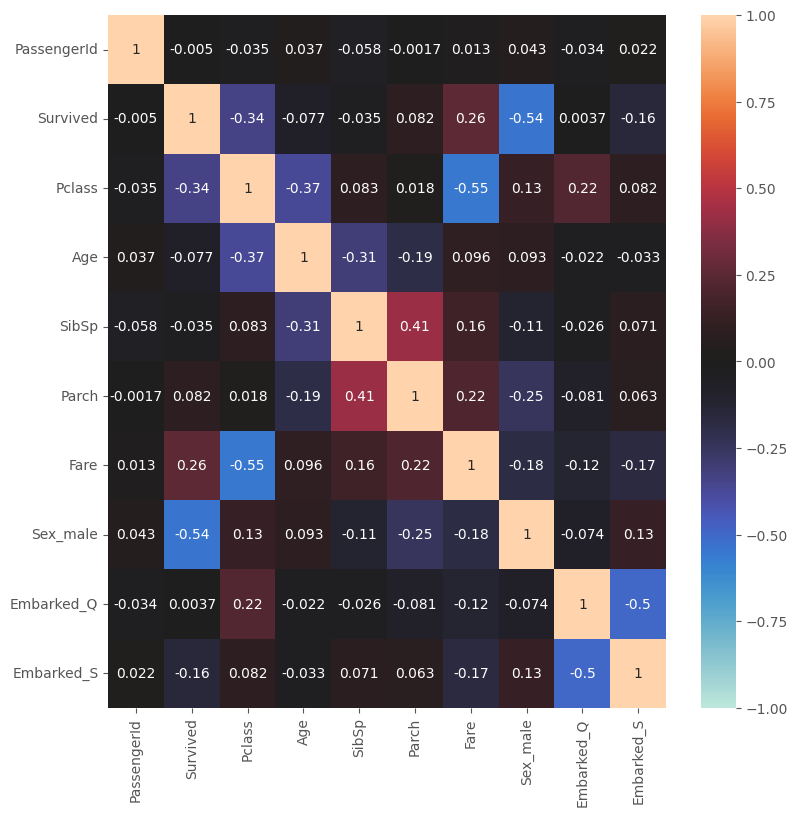

In [889]:
plt.figure(figsize=(9,9))
sns.heatmap(train_df_corr.corr(numeric_only=True),vmax=1,vmin=-1,center=0,annot=True)

# 데이터 전처리와 특징 값 생성 
* 데이터에는 변환 없이 그대로 머신 러닝에서 사용하기 어려운 형태가 포함되어 있습니다. 
* 일단 모델이 읽어 들일 수 있지만, 더 좋은 형태로 변형시키는 편이 정확도가 좋아지는 것들도 있습니다. 
* 결측치도 있었기 때문에 그것을 처리하는 것도 생각해야 합니다. 
* 이런 과정을 데이터의 전처리 과정이라고 합니다. 

## 전처리할 데이터
* Fare(티켓 요금)
* Name(성씨, 호칭, 이름)
* Parch(승선 중인 부모나 자녀의 수), SibSp(승선 중인 형제나 배우자의 수)

## 학습 데이터와 테스트 데이터의 통합 
* 통합하여 전처리하고 그 뒤에 다시 분리

In [890]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

* 결측치의 개수 확인

In [891]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Fare 결측치 메우기 
* Fare 값에 결측치가 하나 존재
* 이 값을 채우기 위해 먼저 Pclass별 Fare의 평균을 구한 후 Pclass의 평균값으로 해당 결측치를 채우는 방법을 사용 

In [892]:
all_df.groupby(["Pclass"])["Fare"].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [893]:
all_df[["Pclass","Fare"]].groupby(["Pclass"]).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [894]:
Fare_mean = all_df[["Pclass","Fare"]].groupby(["Pclass"],as_index=False).mean()

In [895]:
# Fare_mean.columns=["Pclass","Fare_mean"]
Fare_mean.rename(columns={"Fare" : "Fare_mean"},inplace=True)

In [896]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [897]:
# all_df[all_df.Fare.isna()]["Fare"].fillna(13.302889)

In [898]:
# all_df["Fare"].fillna(13.302889)

In [899]:
# all_df[all_df.Fare.isna()]

In [900]:
all_df = pd.merge(all_df,Fare_mean,on="Pclass", how="left")

In [901]:
all_df[all_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,13.302889


In [902]:
all_df[all_df.Pclass==2].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,21.179196


In [903]:
all_df.loc[9,"Fare"]= np.nan

In [904]:
all_df[all_df.Pclass==2].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,NaN,NaN,C,21.179196


In [905]:
# index 9-2등급 1043-3등급
all_df.loc[all_df.Fare.isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,NaN,NaN,C,21.179196
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,13.302889


In [906]:
all_df.loc[all_df.Fare.isnull(), "Fare"] = all_df["Fare_mean"]

In [907]:
all_df.loc[[9,1043],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,21.179196,NaN,C,21.179196
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,NaN,S,13.302889


In [908]:
all_df.drop("Fare_mean",axis=1,inplace=True)

## Name 호칭에 주목하기 

In [909]:
all_df["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

* 호칭을 변수로 추가 
* Name을 str을 써서 문자열로 취득한 후 split()를 사용하여 ,나 . 마침표로 구분하면 0부터 세기 시작해서 2번째 나오는 요소(즉, 1번째)가 호칭이 됨 

In [910]:
# all_df_split= all_df["Name"].apply(lambda x : x.split(",")).to_frame()

In [911]:
# all_df_split.iloc[:,0]

In [912]:
name_df = all_df["Name"].str.split("[,.]",expand=True) #시리즈 안에 리스트

In [913]:
name_df.shape

(1309, 4)

In [914]:
name_df.isnull().sum()

0       0
1       0
2       0
3    1308
dtype: int64

In [915]:
name_df.drop(3,axis=1,inplace=True)

* 위의 결과를 바탕으로 3개의 파생변수 생성 

In [916]:
name_df.columns = ['family_name', 'honorific', 'name']

In [917]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


## 호칭마다 인원수 세기 
* honorific별 인원수를 세기 

In [918]:
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

## 호칭별 연령 분포 확인하기 
* 호칭별 연령 분포를 확인하기 위해서 all_df와 name_df를 결합합니다. 
* aixs 옵션을 1로 설정하여 세로로 결합하지 않고 가로로 결합합니다. 

In [919]:
all_df = pd.concat([all_df,name_df],axis=1)

* boxplot은 데이터의 분포를 확인할 수 있는 좋은 그림이다. 
* sns의 기능을 이용하여 시각화한다 

In [920]:
plt.style.use("ggplot")

<Axes: xlabel='honorific', ylabel='Age'>

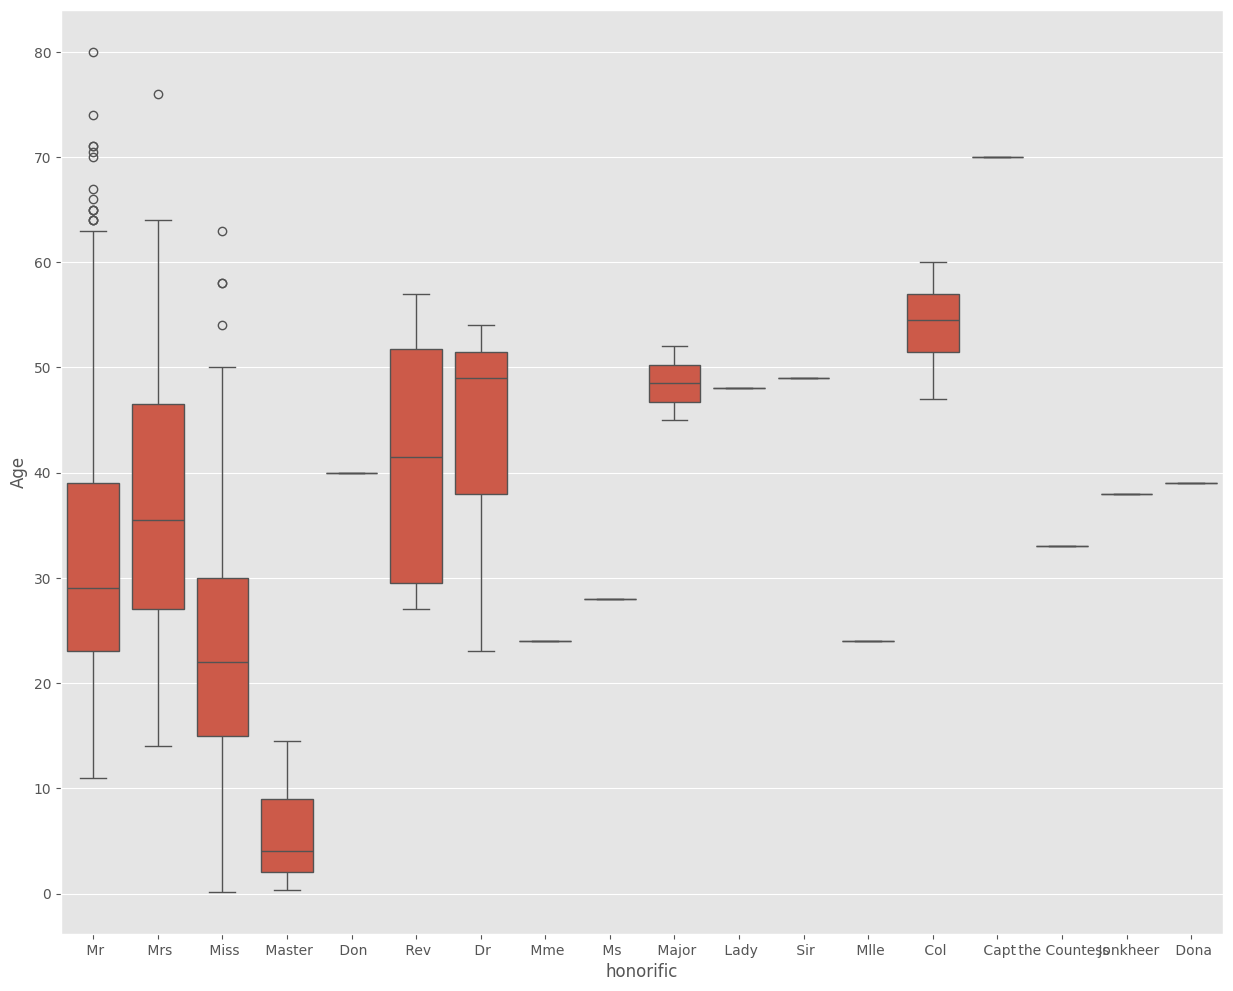

In [921]:
plt.figure(figsize=(15,12))
sns.boxplot( data = all_df , x= "honorific",  y="Age")

## 호칭별 연령 평균값 확인하기 
* 각 호칭의 연령 평균값도 확인해보겠습니다. 

In [922]:
# all_df.groupby(["honorific"])[["Age"]].sum()

In [923]:
# all_df.isnull().sum()

In [924]:
all_df.groupby(["honorific"])[["Age"]].agg(["mean","median","min","max","var","std","count"])

Age                                                 
                   mean median    min   max         var        std count
honorific                                                               
Capt          70.000000   70.0  70.00  70.0         NaN        NaN     1
Col           54.000000   54.5  47.00  60.0   30.000000   5.477226     4
Don           40.000000   40.0  40.00  40.0         NaN        NaN     1
Dona          39.000000   39.0  39.00  39.0         NaN        NaN     1
Dr            43.571429   49.0  23.00  54.0  137.619048  11.731115     7
Jonkheer      38.000000   38.0  38.00  38.0         NaN        NaN     1
Lady          48.000000   48.0  48.00  48.0         NaN        NaN     1
Major         48.500000   48.5  45.00  52.0   24.500000   4.949747     2
Master         5.482642    4.0   0.33  14.5   17.318535   4.161554    53
Miss          21.774238   22.0   0.17  63.0  150.039890  12.249077   210
Mlle          24.000000   24.0  24.00  24.0    0.000000   0.000000     2
Mme           24.000000   24.0  24.00  24.0         NaN        NaN     1
Mr            32.252151   29.0  11.00  80.0  154.308293  12.422089   581
Mrs           36.994118   35.5  14.00  76.0  166.455586  12.901767   170
Ms            28.000000   28.0  28.00  28.0         NaN        NaN     1
Rev           41.250000   41.5  27.00  57.0  144.500000  12.020815     8
Sir           49.000000   49.0  49.00  49.0         NaN        NaN     1
the Countess  33.000000   33.0  33.00  33.0         NaN        NaN     1

## 호칭별 생존율 차이 확인하기 
* 호칭에 따라 평균 연령에 차이가 있음이 확인되었습니다. 
* 이제 호칭에 따라 생존율에도 차이가 있는지 확인해봅시다. 

In [925]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [926]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [927]:
all_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Peter,Master,Michael J


In [928]:
train_df.shape

(891, 12)

In [929]:
test_df.shape

(418, 11)

In [930]:
name_df[:train_df.shape[0]].shape

(891, 3)

* train_df에서 honorific, Survived, PassengerId를 빼낸 후 결측치를 포함한 행을 삭제하고 honorific, Survived별로 인원수를 집계

In [931]:
train_df2 = pd.concat([train_df,name_df[:train_df.shape[0]]],axis=1)

In [932]:
test_df2 = pd.concat([test_df,name_df[train_df.shape[0]:]],axis=1)

In [933]:
print(train_df2.shape)
print(test_df2.shape)

(891, 15)
(836, 14)


<Axes: xlabel='honorific'>

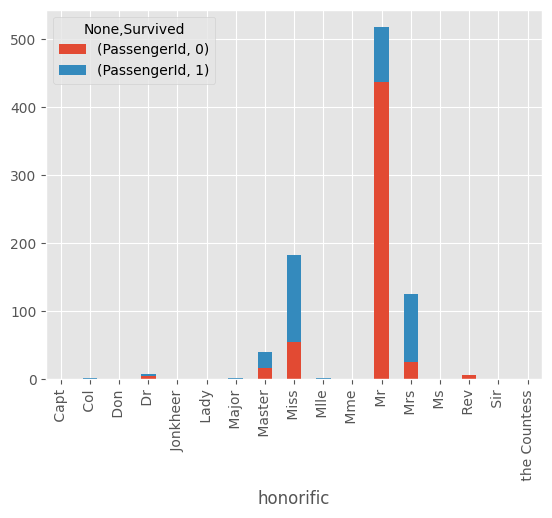

In [934]:
train_df2[["honorific","Survived","PassengerId"]].dropna(). \
groupby(["honorific","Survived"]).count().unstack().plot.bar(stacked=True)

* 여성에게 사용되는 Miss나 Mrs는 생존율이 높은 반면, 남성에게 사용되는 Mr는 사망률이 높은 것으로 나타남 
* 또 남성 중에서도 젊은 남성에게 사용되는 Master는 Mr와 비교할 때 생존율이 높습니다. 
* 앞서 서술한 연령, 성별 생존율과 같은 경향을 띱니다. 
* 연령은 결측치가 많은 데이터이므로 여기서 구한 호칭 데이터가 연령을 보완하는 효과적인 변수가 될 가능성이 있습니다. 

## 연령의 결측치를 호칭별 평균 연령으로 보완하기 
* 원래 데이터에 호칭별 평균 연령을 추가하고, 그 후에 연령이 결손된 곳을 호칭의 평균 연령으로 보충을 진행 
* honorific_Age는 불필요하므로 삭제 

In [935]:
honorific_age_mean = all_df[["honorific", "Age"]].groupby(["honorific"],as_index=False).mean()
# all_df[["honorific", "Age"]].groupby(["honorific"]).mean().reset_index()

In [936]:
honorific_age_mean

,honorific,Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [937]:
all_df["Age"].isnull().sum()

263

In [938]:
all_df = pd.merge(all_df,honorific_age_mean, on="honorific", how="left")

In [939]:
all_df.rename(columns={ "Age_x" : "Age", "Age_y": "Age_mean"},inplace=True)

In [940]:
all_df.loc[all_df["Age"].isnull(),  "Age"]  = all_df["Age_mean"]

In [941]:
all_df.Age.isnull().sum()

0

In [942]:
all_df.drop("Age_mean",axis=1,inplace=True)

## 가족 인원수 추가하기 
* Parch(승선 중인 부모나 자녀의 수)와 SibSp(승선 중인 형제나 배우자의 수)라는 가족과 관련한 변수가 두 개 포함 
* 따라서 우선 이들 변수를 더해 family_num(가족수)를 만들어 보겠습니다. 

In [943]:
all_df["family_num"] =all_df['Parch'] + all_df["SibSp"]

In [944]:
all_df["family_num"].value_counts(normalize=True)

family_num
0     0.603514
1     0.179526
2     0.121467
3     0.032850
5     0.019099
4     0.016807
6     0.012223
10    0.008403
7     0.006112
Name: proportion, dtype: float64

In [945]:
all_df.loc[all_df.family_num == 0,"alone"] = 1 

In [946]:
all_df.alone.isnull().sum()

519

In [947]:
all_df.alone.fillna(0,inplace=True)

/tmp/ipykernel_377/3679758619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df.alone.fillna(0,inplace=True)


## 홀로 승선했는지 여부를 새로운 변수로 추가하기
* 가족 인원수를 확인하면 함께 배에 탄 가족 수가 0명, 즉 1명이 승선한 경우가 절반이상입니다. 
* 타이타닉호의 조난과 같은 상황이라면 가족이 함께 행동했을 가능성이 있습니다. 
* 따라서 1명인지 아니면 같은 승선 가족이 있는지가 생존에 영향을 줄 수 있으므로 alone(1이면 1명, 그렇지 않으면 0)이라는 변수를 추가하겠습니다. 

In [948]:
all_df.alone.isnull().sum()

0

## 불필요한 변수 삭제하기 
* PassengerId는 단순히 승객의 ID이므로 예측에 불필요 
* Name도 파생변수로 만들었으니 불필요
* 파생변수의 name은 고유 명사이니 불필요 
* family_name도 혼자 탑승한 인원이 많기 때문에 가족 단위 분석이 어려운 문제로 삭제 

In [949]:
all_df.drop(["PassengerId","Name","name","family_name","Ticket","Cabin"],axis=1,inplace=True)

## 카테고리 변수를 수치로 변환하기 
* 변수 형태가 object인 것을 카테고리 변수로 변환 

In [950]:
categories = all_df.dtypes[all_df.dtypes == "object"].index.tolist()

In [951]:
categories

['Sex', 'Embarked', 'honorific']

## Mr, Miss, Mrs, Master 이외는 other로 통합하기 
* 해당 이외의 호칭은 데이터수가 적기 때문에 학습이 잘 안될 수 있다. 
* other이라는 값으로 통합 

In [952]:
all_df.honorific.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [953]:
# all_df.honorific = all_df.honorific.apply(lambda x : x.strip())
# all_df.loc[~all_df.honorific.isin(['Mr', 'Miss', 'Mrs', 'Master']), 'honorific' ] = 'Other'


In [954]:
all_df.honorific = all_df.honorific.apply(lambda x : x.strip())

In [955]:
all_df[all_df.honorific.isin(["Mr","Miss","Mrs","Master"])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1303,NaN,3,female,28.000000,0,0,7.7750,S,Miss,0,1.0
1304,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,0,1.0
1307,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0


In [956]:
# all_df[~all_df.honorific.isin(["Mr","Miss","Mrs","Master"]),"honorific"] = 'Other'
all_df.loc[~all_df.honorific.isin(['Mr', 'Miss', 'Mrs', 'Master']), 'honorific' ] = 'Other'

In [957]:
all_df.honorific.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

## 문자열을 수치로 변환하기 : 라벨 인코딩 
* pd.get_dummies()를 사용하여 one-hot으로 변경하거나 
* label encoding으로 변환가능 
* one-hot은 카테고리의 수에 따라서 변수가 증가
* label encoding은 변수의 수는 그대로 유지 

In [958]:
from sklearn.preprocessing import LabelEncoder

* LabelEncoder()는 결측치가 있으면 작동하지 않기 때문에 Embarked에 포함된 결측치는 missing등의 임의의 문자열로 변환 

In [959]:
all_df.Embarked.isnull().sum()

2

In [960]:
all_df.Embarked = all_df.Embarked.fillna("misiing")

In [961]:
all_df.Embarked.isnull().sum()

0

In [962]:
categories

['Sex', 'Embarked', 'honorific']

In [963]:
categories = all_df.dtypes[all_df.dtypes == 'object'].index.tolist()

In [964]:
for cate in categories:
    le = LabelEncoder()
    le.fit(all_df[cate])
    all_df[cate] = le.transform(all_df[cate])


## 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기 
* 다시 학습 데이터와 테스트 데이터로 분리 
* Survived 값이 null이 아닐 때는 학습 데이터로 하고, null 일때는 테스트 데이터로 합니다. 
* Survived 이외의 변수를 설명 변수(train_X, test_X)로 하고, Survived 값을 목적 변수(train_Y)로 지정 

In [965]:
train_data = all_df[all_df.Survived.notnull()]

In [970]:
train_Y = train_data.pop("Survived") #사라진다

In [971]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,4,0,1.0
887,1,0,19.000000,0,0,30.0000,2,1,0,1.0
888,3,0,21.774238,1,2,23.4500,2,1,3,0.0
889,1,1,26.000000,0,0,30.0000,0,2,0,1.0


# 머신러닝 모델링

## LightGBM
* 최근에는 병렬러 앙상블하는 것이 아니라 결정 트리를 순서대로 갱신해 나가는 그레디언트 부스팅 결정 트리(gradient boosting decision tree) 기법이 제안 
* 이것을 구현하는 방법 중 하나가 바로 LightGBM입니다. 
* 그레디언트 부스팅 결정 트리의 구현 방법에는 LigthGBM과 XGBoost가 있습니다. 
----------------
* LightGBM은 매주 자주 사용되는 기법 중 하나로 아래의 장점이 있습니다. 

1. 실행 속도가 다른 기법들(XGBoost나 딥러닝)보다 빠르다 

2. 결측치나 카테고리 변수가 포함된 상태에서도 모델을 학습시킬 수 있다. 

In [973]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [974]:
import lightgbm as lgb
print(lgb.__version__)

4.3.0


## 과적합과 과소적합 
### 교차검증

In [975]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [977]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_Y, test_size=0.2)

In [978]:
categories = ["Embarked", "Pclass", "Sex","honorific","alone"]

In [981]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid,  categorical_feature=categories, reference=lgb_train)

In [982]:
lgbm_params = {
    "objective":"binary",        
    "random_seed":1234,
}

In [983]:
from platform import python_version

print(python_version())

3.10.12


In [986]:
model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100
                      # early_stopping_rounds=5,
                      # verbose_eval=10
                     )

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [987]:
model_lgb.feature_importance()

array([ 102,   60, 1026,   56,   34, 1117,  127,   34,   97,   11],
      dtype=int32)

<Axes: >

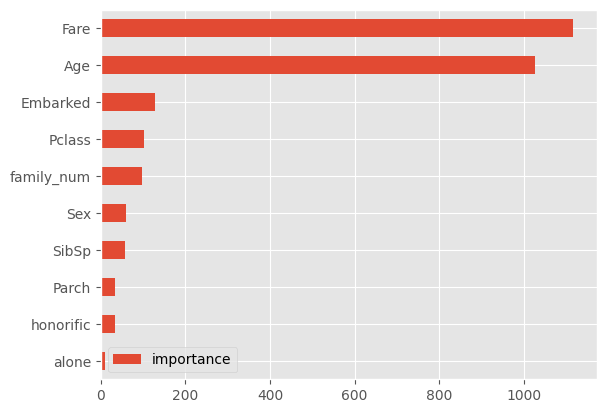

In [989]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

In [990]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [991]:
from sklearn.metrics import accuracy_score

In [992]:
accuracy_score(y_valid, np.round(y_pred))

0.8324022346368715

# LightGBM의 하이퍼파라미터 변경하기

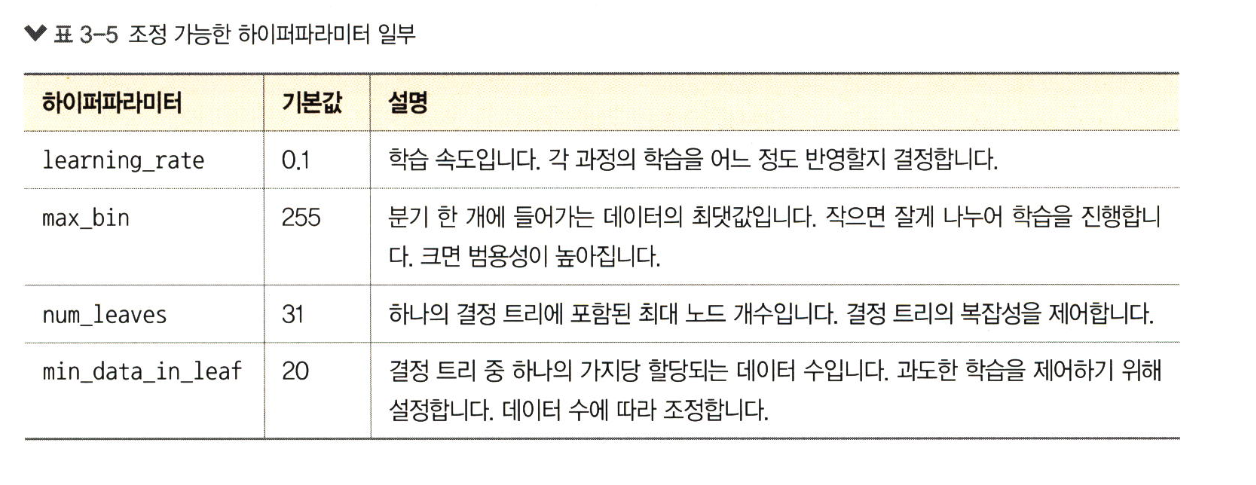

In [ ]:
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves": 20,
    "min_data_in_leaf": 57,
    "andom_seed":1234,
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [ ]:
model_lgb = lgb.train(lgbm_params, lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

In [ ]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [ ]:
accuracy_score(y_valid, np.round(y_pred))